# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)* numpy.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [26]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return -(x**2)* numpy.cos(x) + 2*x*numpy.sin(x) + 2*numpy.cos(x) - numpy.array(2)
print(g(xs))

[0.00000000e+00 2.49722326e-05 3.98224887e-04 2.00481823e-03
 6.28690281e-03 1.51950219e-02 3.11213765e-02 5.68164649e-02
 9.52908702e-02 1.49704300e-01]


Check your solution with the same numpy array:

In [27]:
assert g(0) == 0.

In [28]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [32]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax) - g(xmin)

Check your analytic function:

In [33]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [35]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    deltax = (xmax - xmin)/N
    integration = 0
    for i in range(N):
        integration += (deltax/6)*(f(i*deltax) + 4*f((i*deltax)+deltax/2) + f((i+1)*deltax))
    return integration 
        
print(integrate_numeric(0,4,50))        

1.0965909955991098


Make sure you have implemented Simpson's rule correctly:

In [36]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [37]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


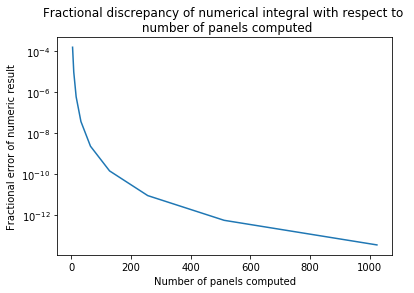

In [63]:

x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

numeric_Integral = []
for i in panel_counts:
    numeric_Integral.append(integrate_numeric(x0,x1,i))
fractional_error = []
for i in numeric_Integral:
    fractional_error.append(abs(result_analytic - i)/result_analytic)

plt.plot(panel_counts,fractional_error)
plt.yscale("log")
plt.xlabel("Number of panels computed")
plt.ylabel("Fractional error of numeric result")
plt.title("Fractional discrepancy of numerical integral with respect to \n number of panels computed")
plt.show()
#print(numeric_Integral)
#print(fractional_error)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

YOUR ANSWER HERE

If the trapezium rule was being used, how would the panel
count affect accuracy? 

An increase in the panel count would yield a decrease in error theoretically and in practice when the computer is working to reasonable precisions. The reduction in error would in practrice become much clearer at larger numbers of panels as it could be that the error doesent decrease from 2 to 3 panels due to some happenstance in the position of the trapeziums and shape of the function. Theoretically the error reduces following number of panemls to the power of negative 2. 